# Ford Gobike Data Exploration
## by Johannes Pagel

## Preliminary Wrangling

> This project explores a dataset consisting of trip data by ford gobike with around 239111 entries.

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [68]:
df = pd.read_csv("fordgobike-tripdata.csv")

In [69]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [70]:
df.shape

(239111, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  bike_share_for_all_trip  239111 non-null  object 
dtypes: f

In [72]:
# change start- and end-time to datetime format

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# extract hour and date of start- and end-times and assign new features
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['start_time'].dt.hour
   
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['start_time'].dt.hour

df['date'] =  df['start_time'].dt.date


In [73]:
# extract weekday

df['weekday'] = df['start_time'].dt.weekday
df['weekday'] = df['weekday'].astype('str')
df['weekday'].replace(['0', '1', '2', '3', '4', '5', '6'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], inplace = True)



In [74]:
df.tail(120)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_hour,end_hour,date,weekday
238991,687,2019-04-01 05:38:00.286,2019-04-01 05:49:27.808,52.0,McAllister St at Baker St,37.777416,-122.441838,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,6087,Subscriber,No,5,5,2019-04-01,Mon
238992,485,2019-04-01 05:40:10.033,2019-04-01 05:48:15.820,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,4810,Subscriber,No,5,5,2019-04-01,Mon
238993,263,2019-04-01 05:43:24.404,2019-04-01 05:47:48.064,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,242.0,Milvia St at Derby St,37.860125,-122.269384,4509,Subscriber,No,5,5,2019-04-01,Mon
238994,67,2019-04-01 05:45:58.494,2019-04-01 05:47:06.335,108.0,16th St Mission BART,37.764710,-122.419957,108.0,16th St Mission BART,37.764710,-122.419957,2280,Subscriber,No,5,5,2019-04-01,Mon
238995,788,2019-04-01 05:32:56.607,2019-04-01 05:46:04.989,123.0,Folsom St at 19th St,37.760594,-122.414817,22.0,Howard St at Beale St,37.789756,-122.394643,6939,Subscriber,No,5,5,2019-04-01,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.566,2019-04-01 00:12:22.517,133.0,Valencia St at 22nd St,37.755213,-122.420975,132.0,24th St at Chattanooga St,37.751819,-122.426614,6430,Subscriber,No,0,0,2019-04-01,Mon
239107,539,2019-04-01 00:03:02.573,2019-04-01 00:12:02.067,78.0,Folsom St at 9th St,37.773717,-122.411647,77.0,11th St at Natoma St,37.773507,-122.416040,4972,Subscriber,Yes,0,0,2019-04-01,Mon
239108,292,2019-04-01 00:06:04.237,2019-04-01 00:10:56.985,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,3415,Subscriber,Yes,0,0,2019-04-01,Mon
239109,471,2019-04-01 00:01:38.411,2019-04-01 00:09:29.965,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5018,Subscriber,Yes,0,0,2019-04-01,Mon


In [75]:
# This code was copied and modified form "Getting distance between two points based on latitude/longitude" on stackoverflow
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

def distance (lat1,lon1,lat2,lon2):
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

df['distance'] = df.apply(lambda row: distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)

### What is the structure of your dataset?

> The dataset consists of 239,111 entries and 14 features. 

### What is/are the main feature(s) of interest in your dataset?

> The main variable of interest is the duration of the trip. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Probably variables like user_type, start_hour, date and duration will influence the trip's duration the most.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

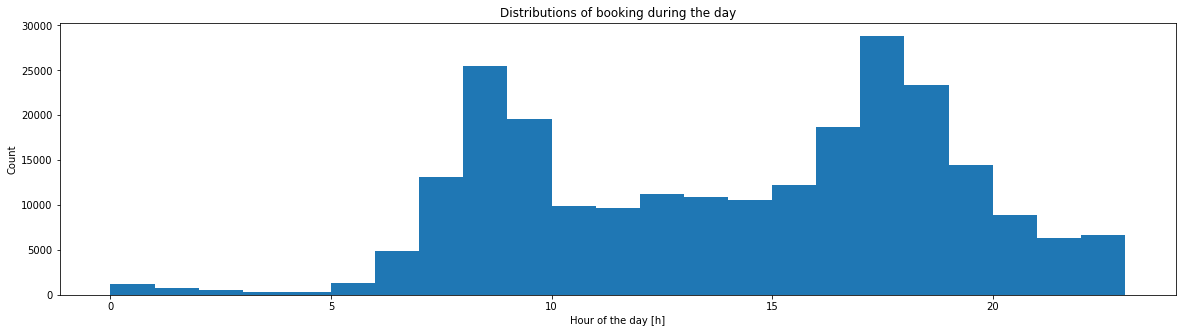

In [76]:
size = 1
bins = np.arange(0, df['start_hour'].max()+size, size)
plt.figure(figsize = [20,5])
plt.hist(df['start_hour'], bins = bins)
plt.title('Distributions of booking during the day')
plt.xlabel('Hour of the day [h]')
plt.ylabel('Count');

> In this first plot, you can see that customers book bikes mainly at two different points of the day. Firstly to get to work and as a second time at around 6 pm to get home from work. In the night/early morning fom 0-5 am there are almost no bookings. Another minimum can be seen in the timespan of 10 am to 4 pm, where most people are at work.

In [77]:
# sort according to date 
df.sort_index(ascending = False, inplace = True)

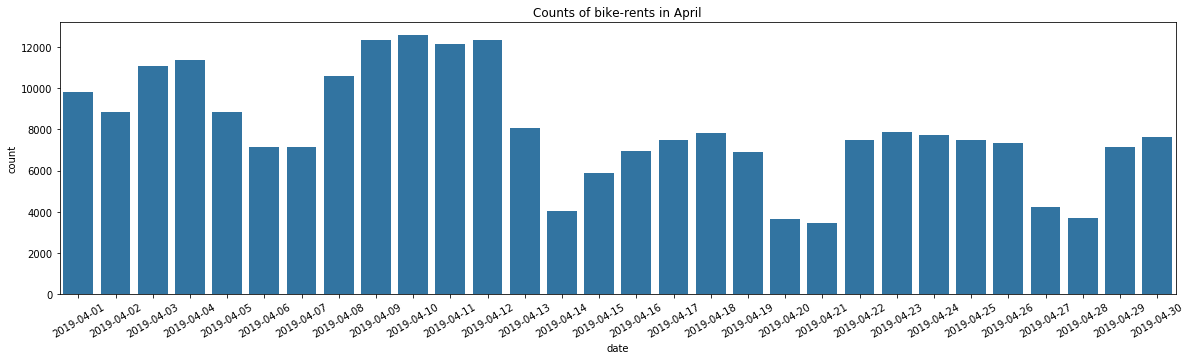

In [78]:
# plot in the right order, use uniform color and adjust figure size 
base_color = sb.color_palette()[0]
plt.figure(figsize = [20,5])

sb.countplot(data = df, x = 'date', color = base_color)
plt.xticks(rotation = 30)
plt.title('Counts of bike-rents in April');

The second plot shows the count of bookings at the different dates in the dataset. I extracted the date in the start_time column to conduct further investigations. The latter showed that bikes are more often rented on Wednesdays to Sundays in comparison to Mondays and Tuesdays. In the present plot I modified the data's order to get a proper timeline.

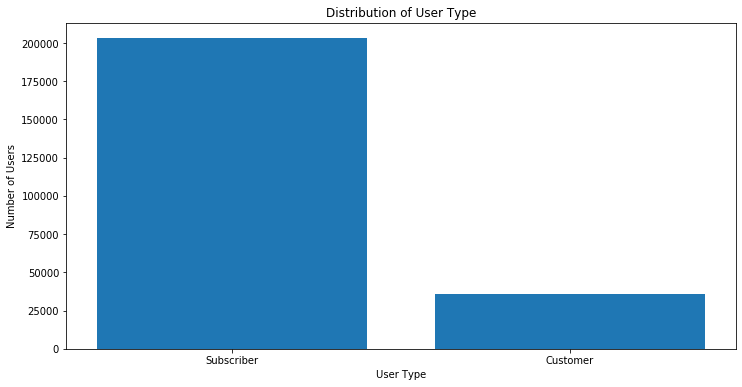

In [79]:
# Investigation types of users 
plt.figure(figsize=[12,6])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

The plot shows that significantly more subscribers have booked bikes in comparison to the other customers.

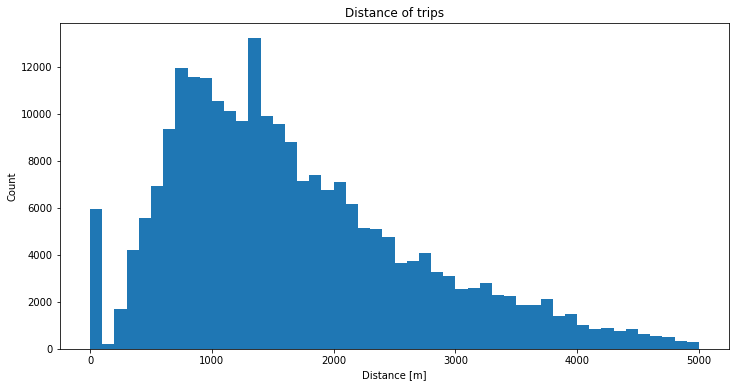

In [80]:
# Investigation of the new 'distance' feature

size = 100
bins = np.arange(0, 5000+size, size)
plt.figure(figsize=[12,6])
plt.hist(data = df, x ='distance', bins = bins)
plt.title('Distance of trips')
plt.xlabel('Distance [m]')
plt.ylabel('Count');

Ploting the new variable 'distance' there were some unusal findings. If you take a closer look at this variable's histogram, there are many observations in a distance of around 0, almost no observations and then - for rising values of x the histogram follows a harmonic right-skewed distribution. Concerning this unusual observation I did not perform any transformation, because it can be possible that somebody books a bike but does not really cover any distance.

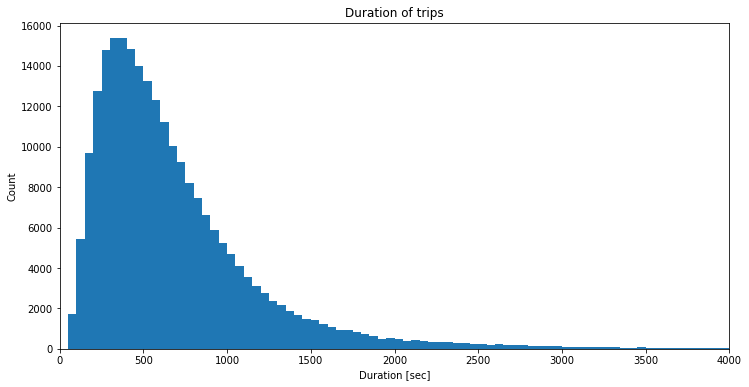

In [81]:
# Investigation of the dependend trip duration
size = 50
bins = bins = np.arange(0, df['duration_sec'].max()+size, size)
plt.figure(figsize=[12,6])
plt.hist(df['duration_sec'], bins = bins)
plt.xlim([0,4000])
plt.title('Duration of trips')
plt.xlabel('Duration [sec]')
plt.ylabel('Count');

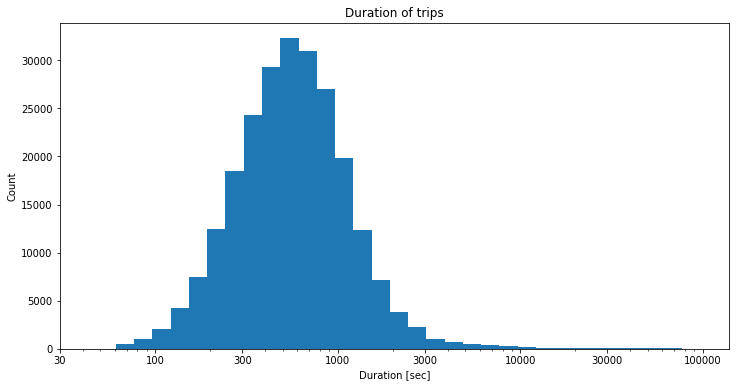

In [82]:
# scale transformation to turn the right-scewed distribution of trip duration into a symmetric distribution on a log-scale
size = 0.1
bin_edges = 10 ** np.arange(1.785330, 4.936358 + size, size)
ticks = [30,100,300,1000,3000,10000,30000,100000]
labls = ['{}'.format(t) for t in ticks]
plt.figure(figsize=[12,6])
plt.hist(data = df, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls)
plt.title('Duration of trips')
plt.xlabel('Duration [sec]')
plt.ylabel('Count');

The two plots both show the distribution of the trips duration. On the first plot you can see that the most often duration was around 400 seconds. This initial plot shows a right scewed distribution, which suggests to modify the scale into a log-scale in order to observe a symmetric distribution. This step was conducted in the second plot of this variable.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration of the trips is mainly distrubuted in a duration from 0 to 4000 seconds. To obtain a proper histogram, I had to set the limit of the x-axis to 4000 and next to that I adjusted the bin size. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The histogram of the trip duration feature shows a right-skewed distribution. In order to receive a symmetric distribution, I transformed the scale to a log-scale creating a second plot for this variable.

## Bivariate Exploration


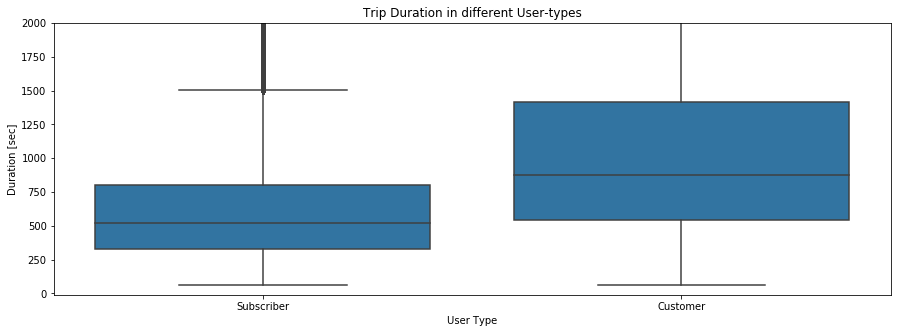

In [83]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])
plt.title('Trip Duration in different User-types')
plt.xlabel('User Type')
plt.ylabel('Duration [sec]');

This boxplot shows a higher variance in trip duration for basic Customers in comparison to Subscribers. This can be seen in the plot by the interquartile-range of both user-types. Furthermore the median in durations is more than 250 seconds lower, which indicates that trips by Customers last in average longer, than those by the Subscribers.

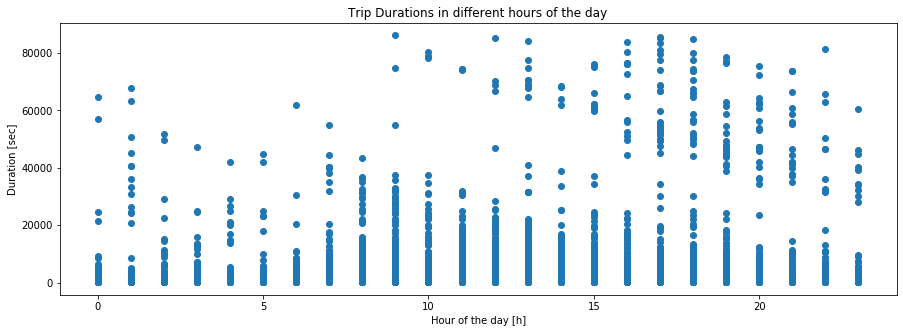

In [84]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
plt.scatter(data = df, x = 'start_hour', y = 'duration_sec')
plt.title('Trip Durations in different hours of the day')
plt.xlabel('Hour of the day [h]')
plt.ylabel('Duration [sec]');

The scatterplot above compare trip durations during different times of the day. Here you can see that people tend to have longer trips in the evening in comparison to the morning hours. This finding sounds logical to me, since people have time after work.

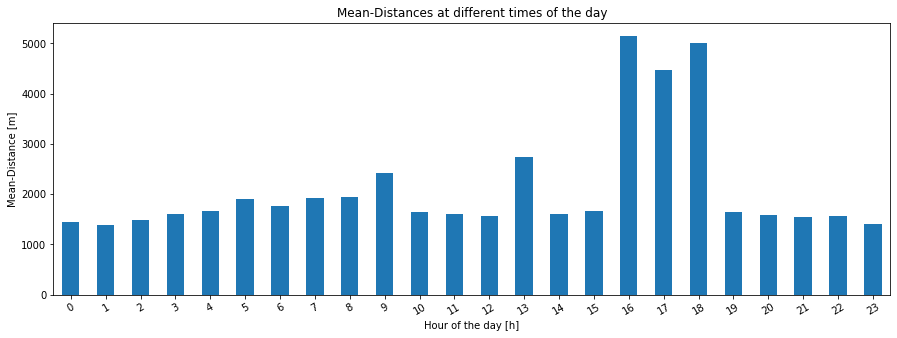

In [85]:
## third plot (two independend variables)

plt.figure(figsize = [15, 5])
mean_dist = df['distance'].groupby(df['start_hour']).agg(np.mean).plot.bar(legend = '')
plt.xticks(rotation = 30)
plt.title('Mean-Distances at different times of the day')
plt.xlabel('Hour of the day [h]')
plt.ylabel('Mean-Distance [m]');

This barplot above shows a very similar finding to the plot before. Here the variable of interest is not the duration, but the mean-distance of the trips during different times of the day. As is the investigation before, people tend to also have longer trips in distance.

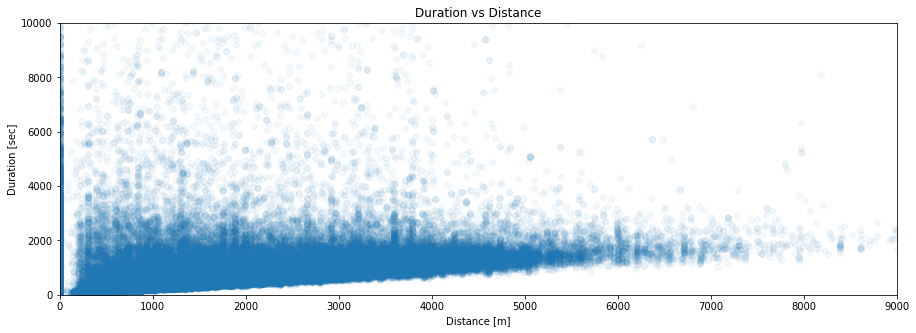

In [86]:
## fourth plot (duration vs distance)

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.regplot(data = df, x = 'distance', y = 'duration_sec', fit_reg = False, scatter_kws = {'alpha' : 1/20})
plt.title('Duration vs Distance')
plt.xlabel('Distance [m]')
plt.ylabel('Duration [sec]');
plt.xlim([0,9000])
plt.ylim([0,10000]);

In this comparison between duration and distance you can see that there might be a certain correlation between these two variables. This correlation seems to be lower for smaller distancees and increases for rising values of x. Especially the broad durations for distance of 0 lowers the overall correlation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As you can see in the chart above, subscribers rent the bikes for a smaller timespan than other customers. Next to that, the variance in duration is much smaller for Subscribers than for the other Customers. To observe these findings in a boxplot, I had to modify the y-axis to an interval from -10 to 2000. Furthermore ## description second plot
> Furthermore, the trip durations vary for different times of the day. People tend to sit longer on the bike in the evening-hours in comparison to the early hours where most of the customers go to work.
> In addition, there seems to be a correlation between the distance and the duration of a trip. This relationship in the dataset is stronger for rising distances, since the variance in duration is rather high for low distances.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> People tend to drive longer distances between 4 pm and 6 pm in comparison to other times of the day.

## Multivariate Exploration


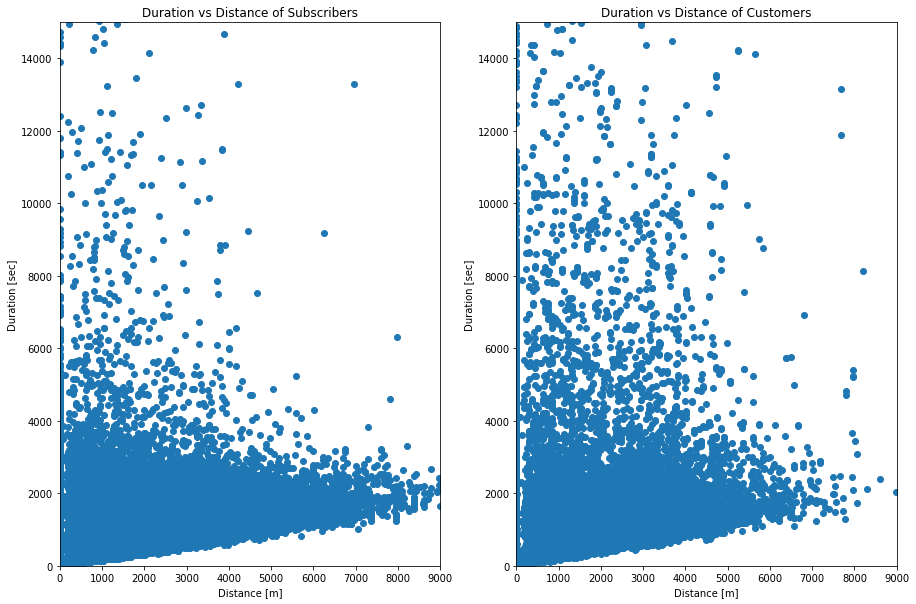

In [110]:
plt.figure(figsize = [15, 10])

plt.subplot(1,2,1)
plt.scatter(data = df[df['user_type'] == 'Subscriber'], x = 'distance', y = 'duration_sec')

plt.xlim([0,9000])
plt.ylim([0,15000])
plt.title('Duration vs Distance of Subscribers')
plt.xlabel('Distance [m]')
plt.ylabel('Duration [sec]')

plt.subplot(1,2,2)
plt.scatter(data = df[df['user_type'] == 'Customer'], x = 'distance', y = 'duration_sec')

plt.xlim([0,9000])
plt.ylim([0,15000])
plt.title('Duration vs Distance of Customers')
plt.xlabel('Distance [m]')
plt.ylabel('Duration [sec]');

The plot above shows that the main variance in duration (Bivariate Exploration) for low distances is mainly caused by the normal customers. 

<Figure size 1080x360 with 0 Axes>

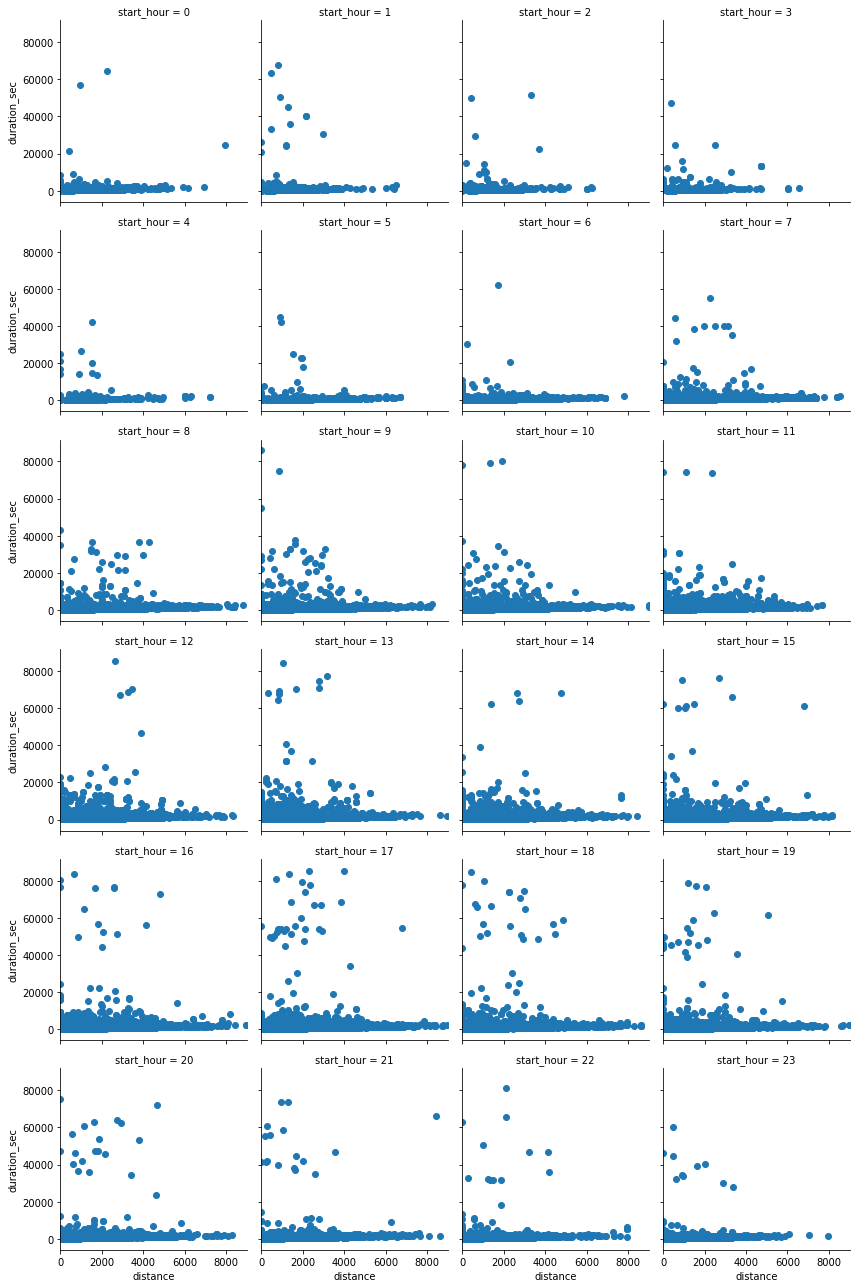

In [88]:
plt.figure(figsize = [15, 5])
g = sb.FacetGrid(data = df, col = "start_hour", margin_titles = True, col_wrap = 4)
g.map(plt.scatter, "distance", "duration_sec")
plt.xlim([0,9000]);

The plot confirms the phenomenon described in the uni- and bivariate analysis. There are many more outliers in the afternoon and evening, at the time people come home from work. In contrast, the hours between 8-10 am show a low variance in duration, which makes sense if people want to get to work on time.

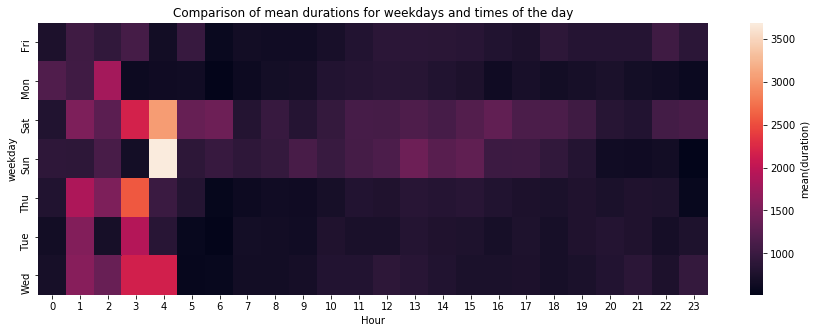

In [89]:
plt.figure(figsize = [15, 5])
cat_means = df.groupby(['start_hour', 'weekday']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'weekday', columns = 'start_hour',
                            values = 'duration_avg')
sb.heatmap(cat_means, annot = False, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration)'})
plt.title('Comparison of mean durations for weekdays and times of the day');
plt.xlabel('Hour');

The last plot compares the durations of trips in terms of the weekday and the time of the day. The main finding here is that the mean duration ist the highest at the weekend in the hours 3 and 4.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, by differentiating the relationship between distance and duration in Subscribers and normal Customers it was possible to find out that a big proportion of the variance in that relationship is caused by Customers. Subscribers seem to be more consistent in their average pace (distance / duration) of their trips. Maybe the reason for that finding is that they drive certain routes repeatedly.
